# Generalizing linear regression- Perceptrons

In part-1 of the session we developed a model for predicting house prices using linear regression. As the name sugeests, the model aims to find a linear fit that best describes the training data. However, not **all relationships are linear**.
Note that for a *nonlinear data*, it does not mattter how much training data we get linear regression is nable to clearly capture the dynamics of the system, as demonstrated in the following example:

### Example 1. Linear model for nonliear data

Using linear regression to fit nonlinear data described by the function $$y =  \sin \Big(\frac{1}{x}\Big).$$

In [122]:
import numpy as np

 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

%pylab

plt.style.use('seaborn-whitegrid')

import warnings
warnings.filterwarnings("ignore") 

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'y')

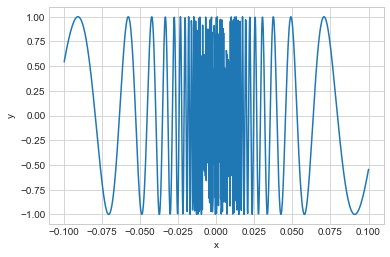

In [123]:
## defining the f_x as an inline function using the built-in function- lambda
#f_x = lambda x:np.sin(np.pi*x)*np.exp(-2.*np.pi*x)   
f_x = lambda x:np.sin(1./x)
# plotting the function 
Xs = np.linspace(-0.1,0.1,1001)
Ys = f_x(Xs) 

fig1 = plt.figure()
fig1.clf()
ax1 = fig1.add_subplot(111)
ax1.plot(Xs,Ys)
ax1.set_xlabel('x')
ax1.set_ylabel('y')

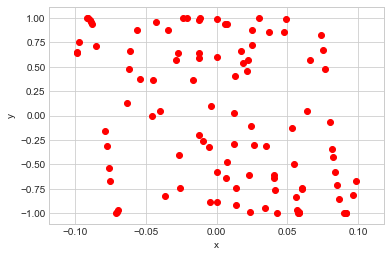

In [105]:
# set the number of training data points
N_train =  101
N_test = 21

X_train = np.random.uniform(low=-0.1, high=0.1, size=(N_train,1))
Y_train = f_x(X_train)

X_test = np.random.uniform(low=-0.1, high=0.1, size=(N_test,1))
Y_test = f_x(X_test)


fig1 = plt.figure()
fig1.clf()
ax1 = fig1.add_subplot(111)
ax1.scatter(X_train,Y_train,color='r',marker='o')
ax1.set_xlabel('x');
ax1.set_ylabel('y');

### Using linear regression to fit this data

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

linear = LinearRegression()
linear.fit(X_train, Y_train)

Y_pred_train = linear.predict(X_train)
Y_pred_test = linear.predict(X_test)

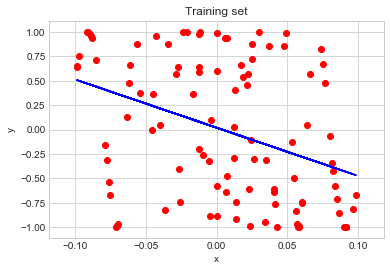

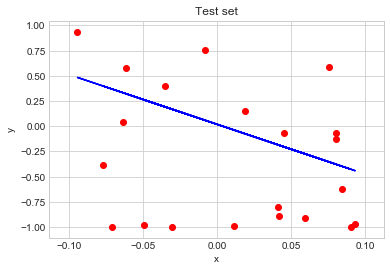

In [113]:
fig2 = plt.figure()
fig2.clf()
ax2 = fig2.add_subplot(111)
ax2.scatter(X_train,Y_train,color='r',marker='o')
ax2.plot(X_train,Y_pred_train,color='b')
ax2.set_xlabel('x');
ax2.set_ylabel('y');
ax2.set_title('Training set');

fig3= plt.figure()
fig3.clf()
ax3 = fig3.add_subplot(111)
ax3.scatter(X_test,Y_test,color='r',marker='o')
ax3.plot(X_test,Y_pred_test,color='b')
ax3.set_xlabel('x');
ax3.set_ylabel('y');
ax3.set_title('Test set');

### Model performance irrelevant of the data size

To further stress on the significance of model selection, we use test the performance of the linear model for successively using larger trainig sets. 

A common practise, to increase the accuracy of models (mesaured through metrics like mean squred error, absolute error,..) is to train the model on larger train data sets. 

In [119]:
def model_performance(f_x,train_sizes,X_test,Y_test,linear):
    mse_list = []
    for N_train in train_sizes:
        X_train = np.random.uniform(low=-0.1, high=0.1, size=(N_train,1))
        Y_train = f_x(X_train)
        linear.fit(X_train, Y_train)
        
        Y_pred_test = linear.predict(X_test)
        mse_list.append(mse(Y_test,Y_pred_test))
    return mse_list

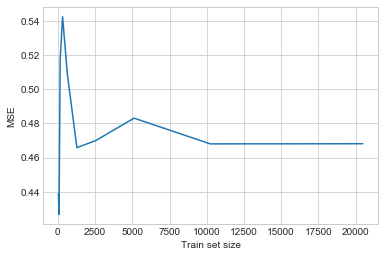

In [128]:
train_sizes = [40,80,160,320,640,1280,2560,5120,10240,20480]

mse_list = model_performance(f_x,train_sizes,X_test,Y_test,linear)

fig4= plt.figure()
fig4.clf()
ax4 = fig4.add_subplot(111)
ax4.plot(train_sizes, mse_list)
ax4.set_xlabel('Train set size');
ax4.set_ylabel('MSE');